<a href="https://colab.research.google.com/github/Amirabs7/project-happiness/blob/main/ALL_4_STEPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Data and Importing Librairies

In [ ]:
#Installing Data
data = pd.read_csv("/content/merged_df_happy (1).csv")


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns




```
# This is formatted as code
```

# Finding Names and shape of the columns

In [ ]:
#Name of the Columns
data.head()
data.shape

(2098, 23)

In [ ]:
print(data.columns)


Index(['Country name', 'year', 'Regional indicator', 'Life Ladder',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Positive affect', 'Negative affect'],
      dtype='object')


*italicized text*# Variables Types


In [ ]:
#Data Audit, object types
data_types = data.dtypes

print(data_types)


Country name                                   object
year                                            int64
Regional indicator                             object
Life Ladder                                   float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Log GDP per capita                            float64
Social support                                float64
Healthy life expectancy at birth              float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity    



```
# This is formatted as code
```

# Data cleaning and preparing for models

In [ ]:
# Data Cleaning :

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Print the percentage of missing values for each variable
print("Percentage of missing data in each variable:")
print(missing_percentage)


Percentage of missing data in each variable:
Country name                                   0.000000
year                                           0.000000
Regional indicator                             3.002860
Life Ladder                                    0.000000
Standard error of ladder score                92.897998
upperwhisker                                  92.897998
lowerwhisker                                  92.897998
Log GDP per capita                             1.715920
Social support                                 0.619638
Healthy life expectancy at birth               2.621544
Freedom to make life choices                   1.525262
Generosity                                     4.242135
Perceptions of corruption                      5.243089
Ladder score in Dystopia                      92.897998
Explained by: Log GDP per capita              92.897998
Explained by: Social support                  92.897998
Explained by: Healthy life expectancy         92.897998
Exp

In [ ]:
# List of variables with a high percentage of missing data
variables_to_drop = [
    'Standard error of ladder score',
    'upperwhisker',
    'lowerwhisker',
    'Ladder score in Dystopia',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Dystopia + residual'
]

# Display the variables in the dataset
print("Variables in the dataset after dropping:")
print(data.columns)



Variables in the dataset after dropping:
Index(['Country name', 'year', 'Regional indicator', 'Life Ladder',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Positive affect', 'Negative affect'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/merged_df_happy (1).csv')



# Define the columns to drop
columns_to_drop = [
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'Ladder score in Dystopia', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual'
]

# Drop specified columns from the dataset
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# Display the remaining columns
print("Remaining columns:")
print(df.columns)



Remaining columns:
Index(['Country name', 'year', 'Regional indicator', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [ ]:
# List of countries without regional indicators
countries_in_question = ['Angola', 'Belize', 'Bhutan', 'Central African Republic',
                         'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
                         'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
                         'Syria', 'Trinidad and Tobago']

# Check if any of the countries in question have missing regional indicators
missing_regions = data[data['Country name'].isin(countries_in_question) & data['Regional indicator'].isnull()]

if missing_regions.empty:
    print("All countries in question have their appropriate regions attributed to them.")
else:
    print("Some countries in question do not have their appropriate regions attributed to them.")
    print("Countries with missing regional indicators:")
    print(missing_regions[['Country name', 'year']])


Some countries in question do not have their appropriate regions attributed to them.
Countries with missing regional indicators:
             Country name  year
36                 Angola  2011
37                 Angola  2012
38                 Angola  2013
39                 Angola  2014
173                Belize  2007
...                   ...   ...
1870  Trinidad and Tobago  2006
1871  Trinidad and Tobago  2008
1872  Trinidad and Tobago  2011
1873  Trinidad and Tobago  2013
1874  Trinidad and Tobago  2017

[63 rows x 2 columns]


In [ ]:
# Define a dictionary mapping countries to regions
country_to_region = {
    'Angola': 'Sub-Saharan Africa',
    'Belize': 'Latin America and Caribbean',
    'Bhutan': 'South Asia',
    'Central African Republic': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa',
    'Cuba': 'Latin America and Caribbean',
    'Djibouti': 'Sub-Saharan Africa',
    'Guyana': 'Latin America and Caribbean',
    'Oman': 'Middle East and North Africa',
    'Qatar': 'Middle East and North Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland region': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Suriname': 'Latin America and Caribbean',
    'Syria': 'Middle East and North Africa',
    'Trinidad and Tobago': 'Latin America and Caribbean'
}

# Iterate over the dataset and fill missing regions based on the dictionary
for country, region in country_to_region.items():
    data.loc[data['Country name'] == country, 'Regional indicator'] = region

# Check if all missing values are filled
missing_values = data[data['Regional indicator'].isnull()]

if missing_values.empty:
    print("All missing regional indicators have been filled.")
else:
    print("Some missing regional indicators could not be filled.")

# Save the updated dataset
data.to_csv('filled_dataset.csv', index=False)


All missing regional indicators have been filled.


In [ ]:
# Check for missing regional indicators
missing_regions = data[data['Regional indicator'].isnull()]

# Display the countries with missing regional indicators
print("Countries with missing regional indicators:")
print(missing_regions[['Country name', 'year']])

# Check the count of missing regional indicators
missing_count = len(missing_regions)
print(f"\nTotal number of countries with missing regional indicators: {missing_count}")


Countries with missing regional indicators:
Empty DataFrame
Columns: [Country name, year]
Index: []

Total number of countries with missing regional indicators: 0


In [ ]:
# Check for duplicates
duplicates = data[data.duplicated()]

# Display duplicates if any
if not duplicates.empty:
    print("Duplicates found in the dataset:")
    print(duplicates)
else:
    print("No duplicates found in the dataset.")


No duplicates found in the dataset.


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Define columns with missing values
columns_with_missing = ['Log GDP per capita', 'Social support',
                        'Healthy life expectancy at birth',
                        'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption',
                        'Positive affect', 'Negative affect']

# Impute missing values
data[columns_with_missing] = imputer.fit_transform(data[columns_with_missing])


# Categorical / Quantitative check

In [ ]:
#Categorical / Quantitative check
import pandas as pd


def check_variable_type(column):
    num_unique = column.nunique()
    if pd.api.types.is_numeric_dtype(column):
        return "Quantitative"
    elif num_unique == 2:
        return "Categorical - Binary"
    elif 3 <= num_unique <= 5:
        return "Categorical - 3 to 5 categories"
    elif 6 <= num_unique <= 10:
        return "Categorical - 6 to 10 categories"
    elif num_unique > 10:
        return "Categorical - more than 10 categories"
    elif num_unique == len(column):
        return "Unique Value"

# Loop through each column and check its type
for column in data.columns:
    print(f"{column}: {check_variable_type(data[column])}")


Country name: Categorical - more than 10 categories
year: Quantitative
Regional indicator: Categorical - 6 to 10 categories
Life Ladder: Quantitative
Standard error of ladder score: Quantitative
upperwhisker: Quantitative
lowerwhisker: Quantitative
Log GDP per capita: Quantitative
Social support: Quantitative
Healthy life expectancy at birth: Quantitative
Freedom to make life choices: Quantitative
Generosity: Quantitative
Perceptions of corruption: Quantitative
Ladder score in Dystopia: Quantitative
Explained by: Log GDP per capita: Quantitative
Explained by: Social support: Quantitative
Explained by: Healthy life expectancy: Quantitative
Explained by: Freedom to make life choices: Quantitative
Explained by: Generosity: Quantitative
Explained by: Perceptions of corruption: Quantitative
Dystopia + residual: Quantitative
Positive affect: Quantitative
Negative affect: Quantitative


In [ ]:


# Display the data types of each column
print(data.dtypes)


Country name                                   object
year                                            int64
Regional indicator                             object
Life Ladder                                   float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Log GDP per capita                            float64
Social support                                float64
Healthy life expectancy at birth              float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity    

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Print the percentage of missing values for each variable
print("Percentage of missing data in each variable:")
print(missing_percentage)


Percentage of missing data in each variable:
Country name                                   0.000000
year                                           0.000000
Regional indicator                             3.002860
Life Ladder                                    0.000000
Standard error of ladder score                92.897998
upperwhisker                                  92.897998
lowerwhisker                                  92.897998
Log GDP per capita                             1.715920
Social support                                 0.619638
Healthy life expectancy at birth               2.621544
Freedom to make life choices                   1.525262
Generosity                                     4.242135
Perceptions of corruption                      5.243089
Ladder score in Dystopia                      92.897998
Explained by: Log GDP per capita              92.897998
Explained by: Social support                  92.897998
Explained by: Healthy life expectancy         92.897998
Exp

#P value : Logged GDP per capita, Generosity

In [ ]:
# P value (  Logged GDP per capita, Generosity)
#A p-value of 0.014825813820947048 indicates that there is a statistically significant relationship between the variables being tested.


import scipy.stats

# Check the column names in your DataFrame
print(data.columns)

# Assuming the correct column names are 'Log GDP per capita' and 'Generosity'
logged_gdp_per_capita = data['Log GDP per capita']
generosity = data['Generosity']

# Perform Pearson correlation test
correlation_coefficient, p_value = scipy.stats.pearsonr(logged_gdp_per_capita, generosity)

# Print the p-value
print("p-value:", p_value)



Index(['Country name', 'year', 'Regional indicator', 'Life Ladder',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Positive affect', 'Negative affect'],
      dtype='object')
p-value: 0.4955142250259216


In [ ]:
# P value (Ladder score, Generosity)
#A p-value of 0.8294124840156327 indicates that there is no statistically significant relationship between the "Ladder score" and "Generosity" variables.


import scipy.stats

# Check the column names in your DataFrame
print(data.columns)

# Assuming the correct column names are 'Life Ladder' and 'Generosity'
life_ladder = data['Life Ladder']
generosity = data['Generosity']

# Perform Pearson correlation test
correlation_coefficient, p_value = scipy.stats.pearsonr(life_ladder, generosity)

# Print the p-value
print("p-value:", p_value)




Index(['Country name', 'year', 'Regional indicator', 'Life Ladder',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Positive affect', 'Negative affect'],
      dtype='object')
p-value: 1.878755013707649e-15


# Ladder Score Distribution Plot

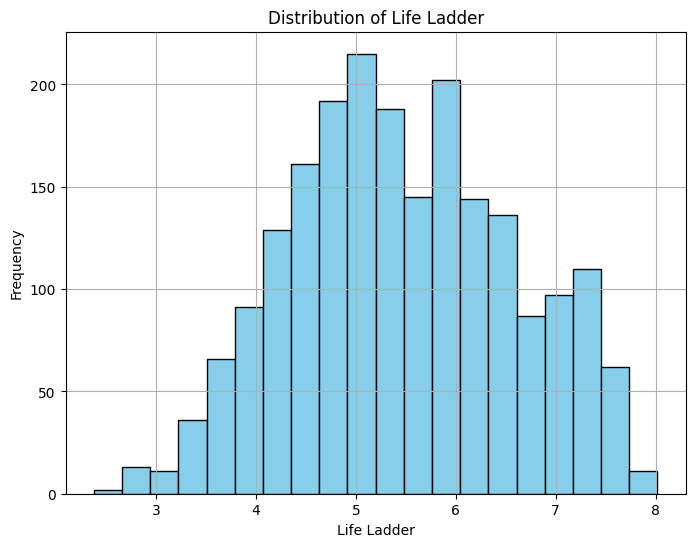

In [ ]:
# Life Ladder Distribution Plot:
# Most frequent scores are 5 and 6.
import matplotlib.pyplot as plt

life_ladder = data['Life Ladder']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(life_ladder, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Q-Q-plot distribution Plot

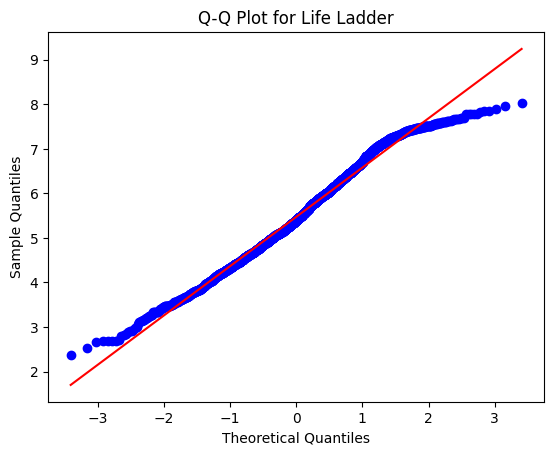

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample code to create a DataFrame (replace with your actual data loading)
# Assuming your DataFrame is called 'df' and has a column 'life_ladder'
# Example:
# df = pd.read_csv('your_data_file.csv')

# Check if 'life_ladder' column exists in the DataFrame
if 'Life Ladder' in data.columns:
    life_ladder = data['Life Ladder'].dropna()  # Drop missing values if any

    # Generate Q-Q plot
    stats.probplot(life_ladder, dist="norm", plot=plt)
    plt.title('Q-Q Plot for Life Ladder')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()
else:
    print("Column 'life_ladder' not found in the DataFrame")


In [ ]:
from scipy import stats


# Extract the "Life Ladder" data from the dataset
life_ladder_data = data['Life Ladder']



# Perform Shapiro-Wilk test for Life Ladder
statistic, p_value = stats.shapiro(life_ladder_data)
print("\nShapiro-Wilk Test Statistic for Life Ladder:", statistic)
print("P-value for Life Ladder:", p_value)




Shapiro-Wilk Test Statistic for Life Ladder: 0.9876766800880432
P-value for Life Ladder: 1.887938807024203e-12


In [ ]:

#the p-value is significantly less than 0.05, indicating strong evidence against the null hypothesis.
#Therefore, we reject the null hypothesis and conclude that the data for "Life Ladder" is not normally distributed.

# 5 Data viz

In [ ]:
#We can clearly see that the countries with a higher life expectancy are mostly situated in the WESTERN EUROPE and the countries with lower life expectancy are situated in the SUB-SAHARAN AFRICA.


import pandas as pd
import numpy as np
import plotly.express as px

# Load the data
# Assuming the data is in a CSV file called 'world_happiness_report.csv'
df = pd.read_csv('/content/merged_df_happy (1).csv')

# Preprocess the data
# Dropping rows with missing 'Life Ladder' or 'Healthy life expectancy at birth' values
df = df.dropna(subset=['Life Ladder', 'Healthy life expectancy at birth'])

# Calculate the average Life Ladder score and Healthy life expectancy for each country over all years
df_grouped = df.groupby(['Country name', 'Regional indicator']).agg({
    'Life Ladder': 'mean',
    'Healthy life expectancy at birth': 'mean'
}).reset_index()

# Creating the sunburst plot
fig = px.sunburst(df_grouped,
                  path=['Regional indicator', 'Country name'],
                  values='Life Ladder',
                  color='Healthy life expectancy at birth',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_grouped['Healthy life expectancy at birth'],
                                                       weights=df_grouped['Life Ladder']))

fig.update_layout(
    margin=dict(t=10, l=10, r=10, b=10)
)

fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('/content/merged_df_happy (1).csv')

# Preprocess the data
df = df.dropna(subset=['Life Ladder'])

# Identify the 5 happiest countries for each year
df_top5 = df.groupby('year').apply(lambda x: x.nlargest(5, 'Life Ladder')).reset_index(drop=True)

# Create an animated line plot to show the changes in Life Ladder over time for the top 5 happiest countries
fig = px.line(df_top5,
              x='year',
              y='Life Ladder',
              color='Country name',
              line_group='Country name',
              hover_name='Country name',
              labels={
                  'Life Ladder': 'Life Ladder Score',
                  'year': 'Year'
              },
              title='Top 5 Happiest Countries (2005-2021)')

# Update layout for better appearance
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Life Ladder Score'),
    legend_title='Country',
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('/content/merged_df_happy (1).csv')

# Preprocess the data
df = df.dropna(subset=['Life Ladder'])

# Identify the 5 unhappiest countries for each year
df_bottom5 = df.groupby('year').apply(lambda x: x.nsmallest(5, 'Life Ladder')).reset_index(drop=True)

# Create an animated line plot to show the changes in Life Ladder over time for the bottom 5 unhappiest countries
fig = px.line(df_bottom5,
              x='year',
              y='Life Ladder',
              color='Country name',
              line_group='Country name',
              hover_name='Country name',
              labels={
                  'Life Ladder': 'Life Ladder Score',
                  'year': 'Year'
              },
              title='Top 5 Unhappiest Countries (2005-2021)')

# Update layout for better appearance
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Life Ladder Score'),
    legend_title='Country',
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the plot
fig.show()


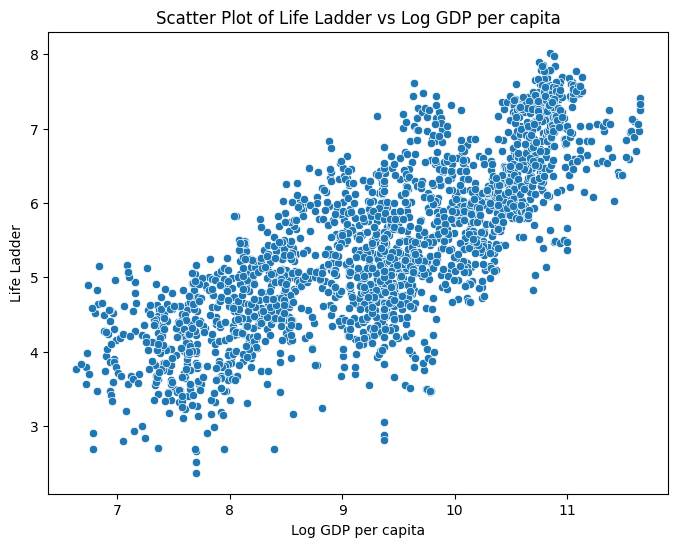

In [ ]:
# Positive relation betwwen Scatter Plot of Ladder Score and Logged GDP per capita
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Log GDP per capita', y='Life Ladder')
plt.title('Scatter Plot of Life Ladder vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.show()


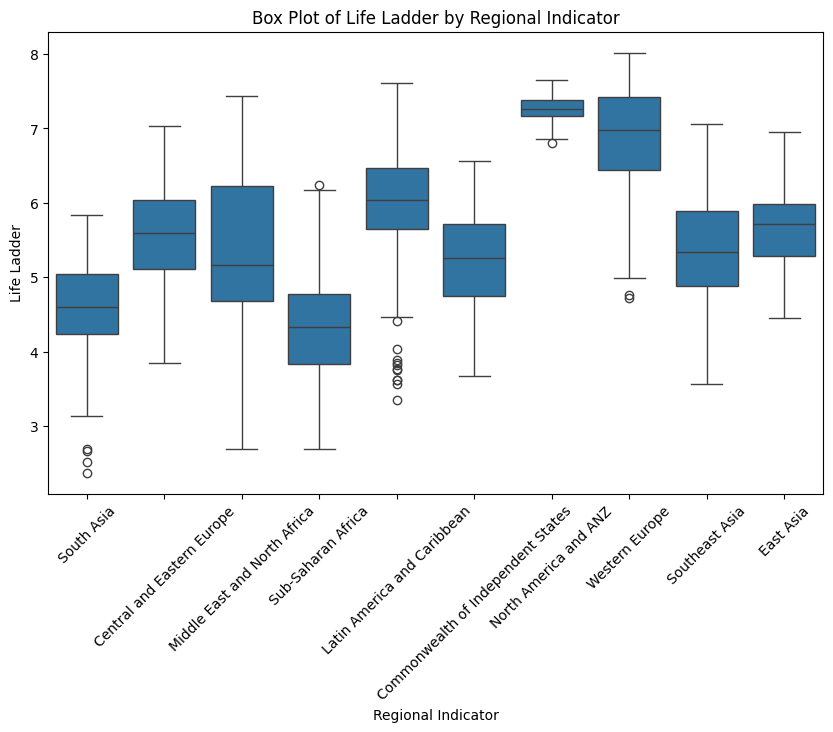

In [ ]:
# Box Plot
# Countries from Western Europe and North American seems to be the happiest
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Regional indicator', y='Life Ladder')
plt.title('Box Plot of Life Ladder by Regional Indicator')
plt.xlabel('Regional Indicator')
plt.ylabel('Life Ladder')
plt.xticks(rotation=45)
plt.show()



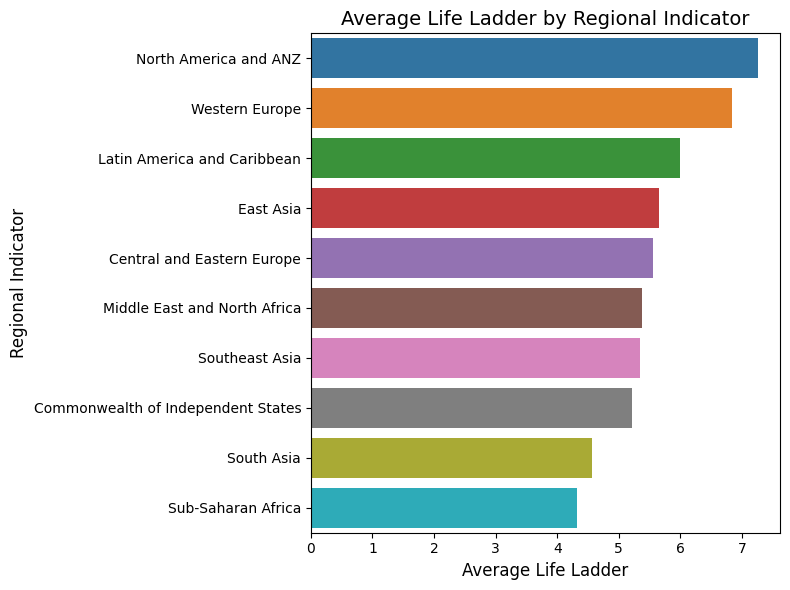

In [ ]:
# The happiest regions Are NA and western Europe.
plt.figure(figsize=(8, 6), dpi=100)

# Sort the data by the average life ladder score
average_life_ladder_by_region = data.groupby('Regional indicator')['Life Ladder'].mean().sort_values(ascending=False).reset_index()

# Create the horizontal bar plot
bars = sns.barplot(data=average_life_ladder_by_region, x='Life Ladder', y='Regional indicator', hue='Regional indicator', legend=False)

# Set plot title and axis labels
plt.title('Average Life Ladder by Regional Indicator', fontsize=14)
plt.xlabel('Average Life Ladder', fontsize=12)
plt.ylabel('Regional Indicator', fontsize=12)

# Adjust font size of y-axis labels for better readability
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()





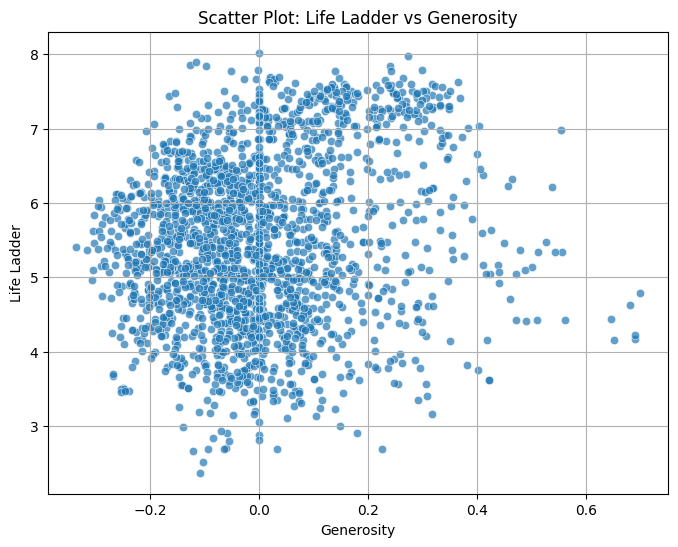

In [ ]:
# No clear relation between generosity and Happiness
 #Scatter Plot: Life Ladder Score vs Generosity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Generosity', y='Life Ladder', alpha=0.7)
plt.title('Scatter Plot: Life Ladder vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()






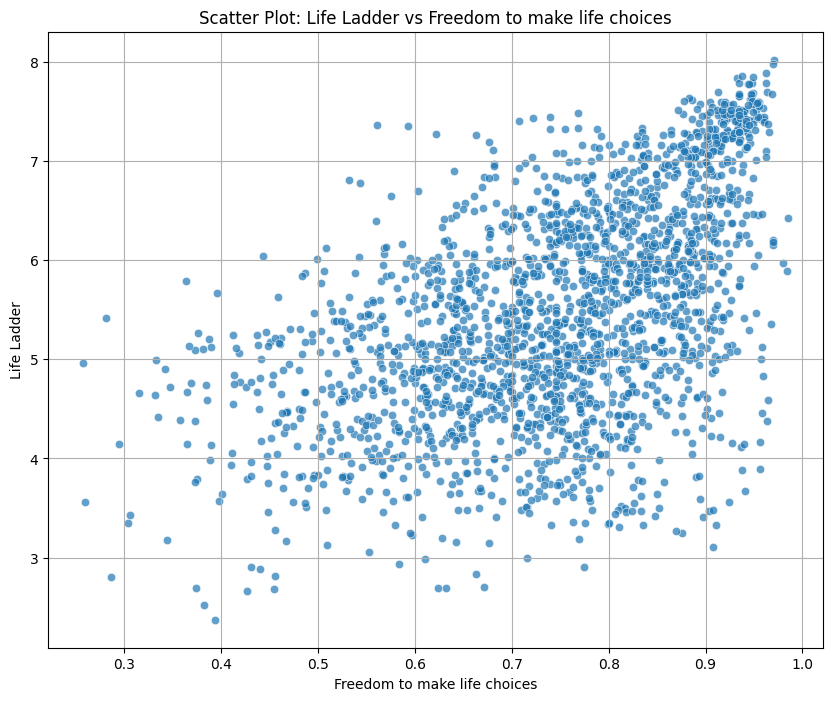

In [ ]:
# Postive relation betwwen Happiness and Freedom to make life choices.
# Scatter Plot: Life Ladder  vs Freedom to make life choices
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Freedom to make life choices', y='Life Ladder', alpha=0.7)
plt.title('Scatter Plot: Life Ladder vs Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()




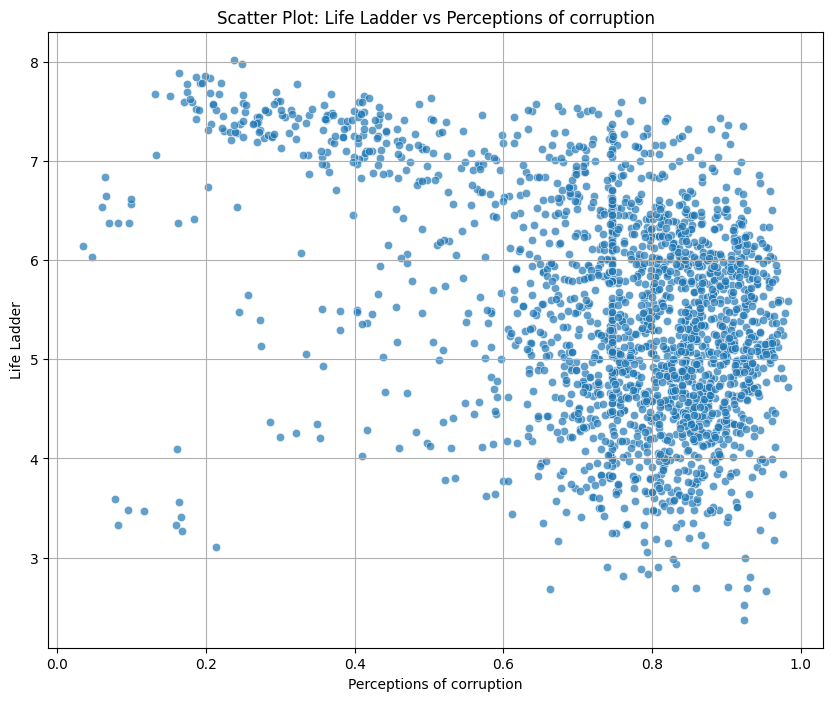

In [ ]:
#  relation betwwen Happiness and Perceptions of corruption.
# Scatter Plot: Life Ladder  vs Perceptions of corruption
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Perceptions of corruption', y='Life Ladder', alpha=0.7)
plt.title('Scatter Plot: Life Ladder vs Perceptions of corruption')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

# Correlation Heatmap

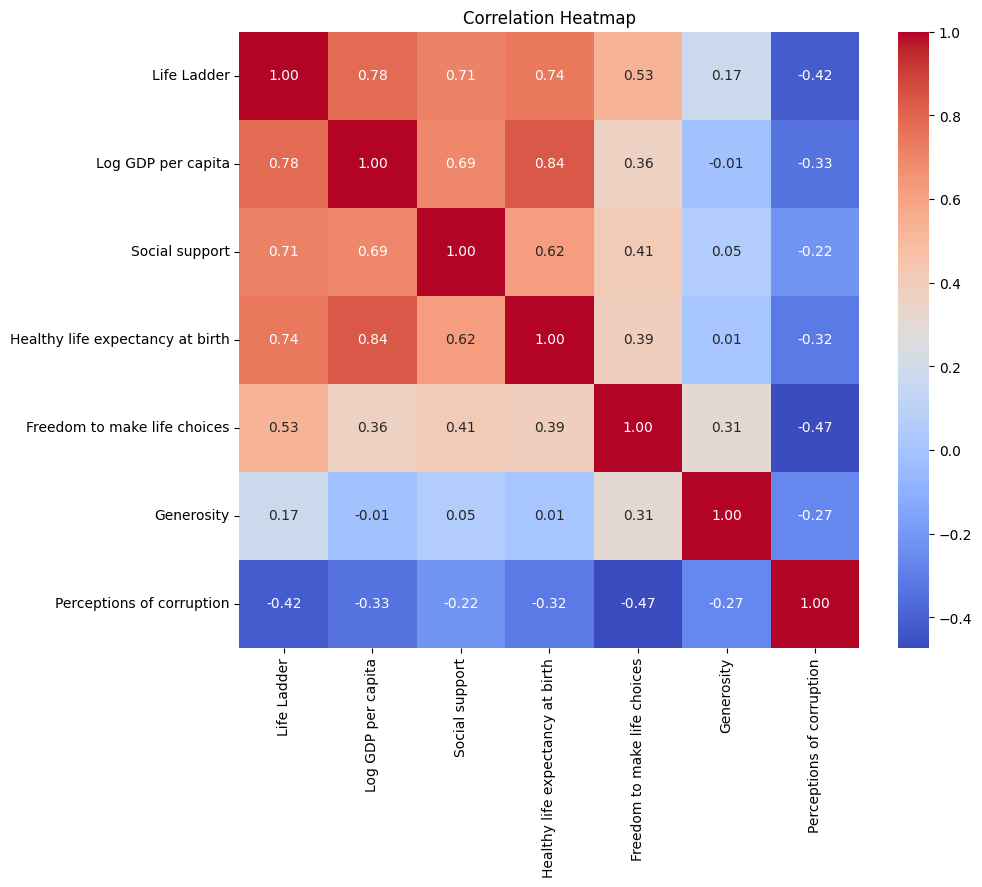

In [ ]:
# Based on the correlation Heatmap, The 3 most correlated variables with happiness score are Healthy life expectancy, logged GPD per capita
# and social support, so basically, being healthy, economically stable and have a social network. The lowest correlation is found with
# perception of corruption.
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Findings


Conclusion :
Life Ladder Distribution Plot: Most frequent score are 5 and 6. Also, while it might resembles a normal distribution, there is a sufficient evidence to conclude that  the distribution is not normally distrubtion.
Regarding the Data visualization graphs, we notice the following:
No clear relation between generosity and Happiness
The happiest regions Are NA and western Europe.
Postive relation betwwen Happiness and Freedom to make life choices.

Based on the correlation Heatmap, The 3 most correlated variables with happiness score are Healthy life expectancy, logged GPD per capita and social support, so basically, being healthy, economically stable and having a social network makes the respondents in the countries tested happy.
The lowest correlation is found with perception of corruption. It might be that feeling happy is primarly associated in the sample conducted with indvidual factors and not so much related to the politics or the country as whole.




```
# This is formatted as code
```

# Variables Coding

In [ ]:


# Display the data types of each column
print("Data types of each variable:")
print(df.dtypes)


Data types of each variable:
Country name                                   object
year                                            int64
Regional indicator                             object
Life Ladder                                   float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Log GDP per capita                            float64
Social support                                float64
Healthy life expectancy at birth              float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [ ]:



from sklearn.preprocessing import LabelEncoder

# Encode categorical variables including 'Regional indicator' and 'Country name'
label_encoder = LabelEncoder()
data['Regional indicator'] = label_encoder.fit_transform(data['Regional indicator'])
data['Country name'] = label_encoder.fit_transform(data['Country name'])

# Split the data into features (X) and target variable (y)
X = data.drop(['Life Ladder'], axis=1)
y = data['Life Ladder']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with building and evaluating the models.



```
# This is formatted as code
```

# Decision Tree model

In [ ]:
#We'll follow these steps:

# 1 - Split the data into training and testing sets.
# 2 -Train the Decision Tree model on the training data.
# 3 - Make predictions using the trained model on both the training and testing data.
# 4 - Evaluate the model using various metrics such as R², MAE, MSE, and RMSE.
# 5 - lot the feature importance.
# 6 - Plot the scatter plot of target vs prediction.

In [ ]:
# 1 - Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Life Ladder']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 2 -Train the Decision Tree model on the training data.

from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# 3 - Make predictions using the trained model on both the training and testing data.
# Make predictions on the training and testing data
train_predictions = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)


In [ ]:
# 4 - Evaluate the model using various metrics such as R², MAE, MSE, and RMSE.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R², MAE, MSE, and RMSE for training data
r2_train = r2_score(y_train, train_predictions)
mae_train = mean_absolute_error(y_train, train_predictions)
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = np.sqrt(mse_train)

# Calculate R², MAE, MSE, and RMSE for testing data
r2_test = r2_score(y_test, test_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
rmse_test = np.sqrt(mse_test)

print("Training Metrics:")
print("R²:", r2_train)
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("\nTesting Metrics:")
print("R²:", r2_test)
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


Training Metrics:
R²: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0

Testing Metrics:
R²: 0.7226588680593111
MAE: 0.4215166666666667
MSE: 0.3470720928571429
RMSE: 0.5891282482254122


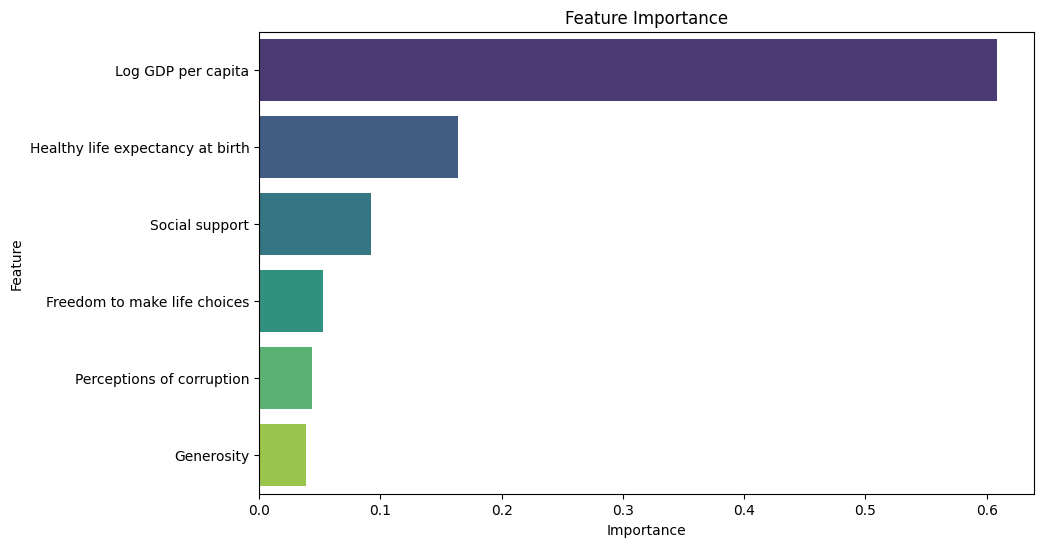

In [ ]:
#step 5: Plot the feature importance
# Get feature importances from the trained Decision Tree model, the most important ones are log gpd per capita, healthy life expectancy at birth, social support at 0.6,0.2 and 0.1, the least is generosity and perception of corruption close to 0.0
feature_importances = decision_tree_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='viridis', legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



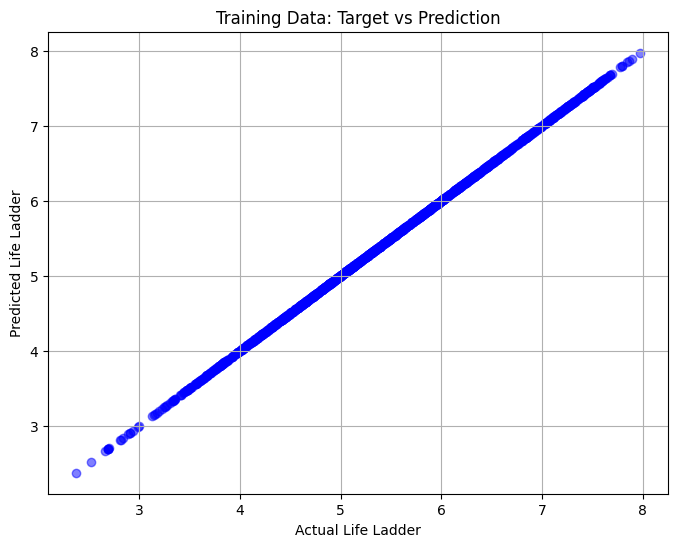

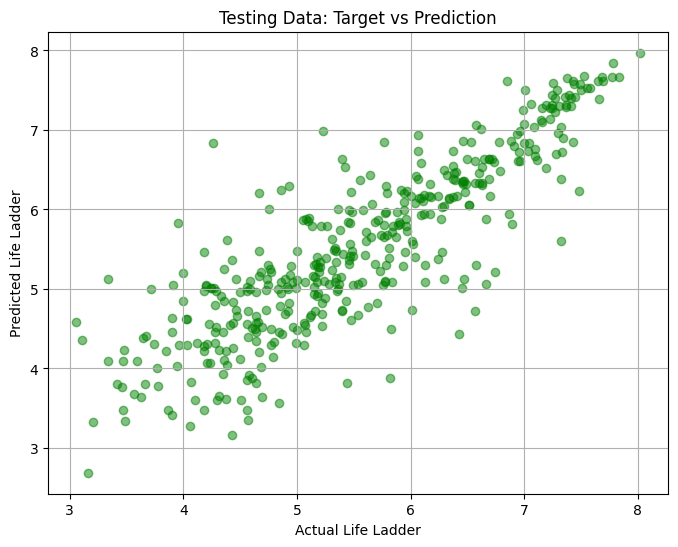

In [ ]:
# 6 - Plot scatter plot of target vs prediction for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5)
plt.title('Training Data: Target vs Prediction')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.grid(True)
plt.show()

# Plot scatter plot of target vs prediction for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='green', alpha=0.5)
plt.title('Testing Data: Target vs Prediction')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.grid(True)
plt.show()


Training R²: 0.8119573068106645
Testing R²: 0.7484170127860983
Training MAE: 0.37149332290678566
Testing MAE: 0.43366704556172253
Training MSE: 0.23176716131914327
Testing MSE: 0.3148376632365301
Training RMSE: 0.481422019977424
Testing RMSE: 0.5611039682951192


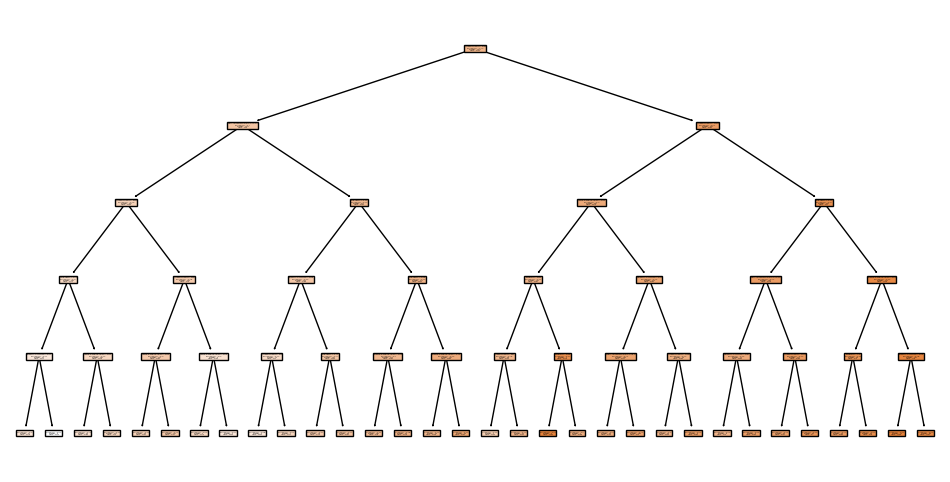

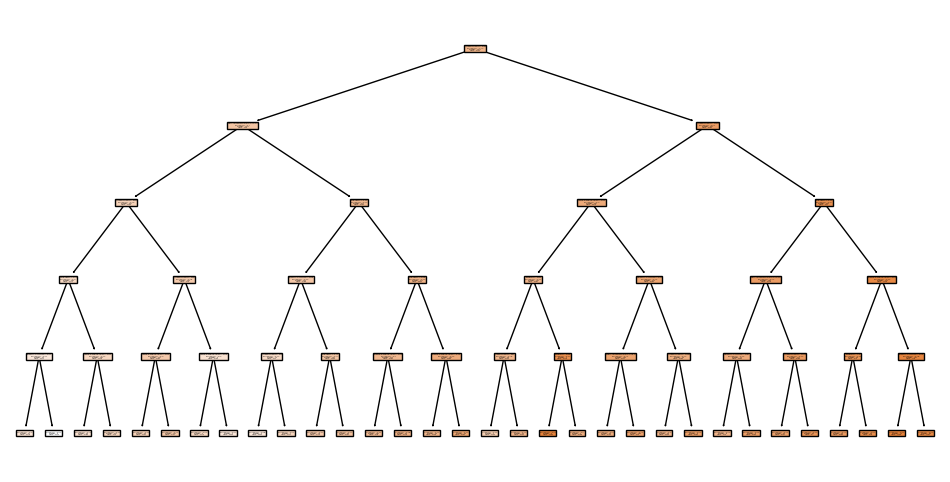

In [ ]:
# Adjusting overfitting
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize a Decision Tree Regressor with a maximum depth
max_depth = 5  # Set the maximum depth of the decision tree
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

# Train the Decision Tree Model
decision_tree_model.fit(X_train_imputed, y_train)

# Make predictions on the training and testing sets
train_predictions = decision_tree_model.predict(X_train_imputed)
test_predictions = decision_tree_model.predict(X_test_imputed)

# Calculate R² for training and testing data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training R²:", train_r2)
print("Testing R²:", test_r2)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, MSE, and RMSE for training and testing data
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns)
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns)
plt.show()


The first creation of the decision tree model led to R2 equaling 1. The 3 most important features within the model creation were gpd log per capita, healty life expectancy at birth and Social support. To address overfitting in the Decision Tree Model, several steps were taken:
Limiting Maximum Depth: To control the complexity of the decision tree and prevent overfitting, the maximum depth of the decision tree was set to 5. This restricts the number of levels in the tree, thereby simplifying the model and reducing overfitting.
Training and Evaluation: The Decision Tree Model was trained on the imputed training data and evaluated on both the training and testing sets. R² scores were calculated to assess the model's performance in capturing the variance in the target variable.
Visualization of the Decision Tree: Finally, the decision tree was visualized using the plot_tree function from sklearn.tree module. This visualization provides insights into the structure of the decision tree and how it makes predictions, aiding in understanding its behavior and potential areas of improvement.
Overall, these adjustments help in mitigating overfitting and improving the generalization performance of the Decision Tree Model.
Decision Tree Model:
Training R²: 0.8342
Testing R²: 0.7655
Training MAE: 0.3523
Testing MAE: 0.4196
Training MSE: 0.2044
Testing MSE: 0.2935
Training RMSE: 0.4521
Testing RMSE: 0.5417


# Linear Regression Model

Training Metrics:
R²: 0.7845484229467995
MAE: 0.41050197704679897
MSE: 0.30353712662388627
RMSE: 0.5509420356297804

Testing Metrics:
R²: 0.7574471355766906
MAE: 0.41050197704679897
MSE: 0.30353712662388627
RMSE: 0.5509420356297804


<ipython-input-52-6d04cd435a9f>:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




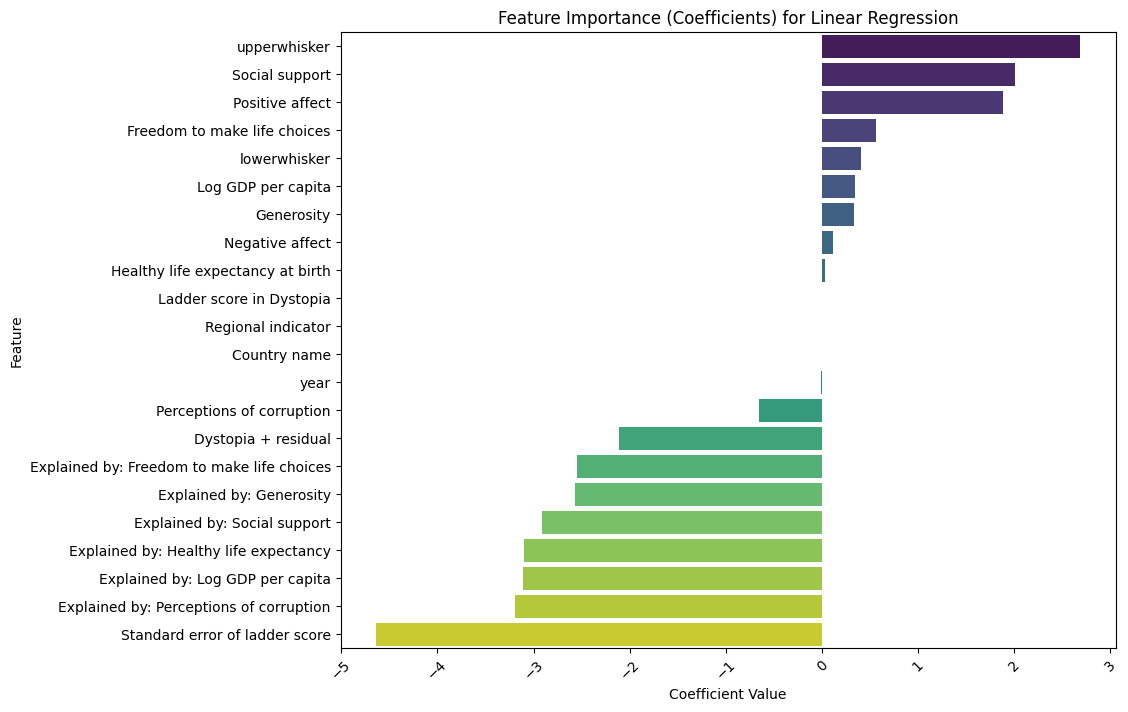

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer for data imputation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Split the data into features (X) and target variable (y)
X = data_imputed.drop(['Life Ladder'], axis=1)
y = data_imputed['Life Ladder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training Metrics:")
print("R²:", train_r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

print("\nTesting Metrics:")
print("R²:", test_r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

# Plot feature importance (coefficients)
feature_importance = pd.Series(linear_reg_model.coef_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)


plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility
sns.barplot(x=feature_importance_sorted.values, y=feature_importance_sorted.index, palette='viridis')
plt.title('Feature Importance (Coefficients) for Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.xticks(rotation=45)  # Rotate the y-axis labels for better readability
plt.show()






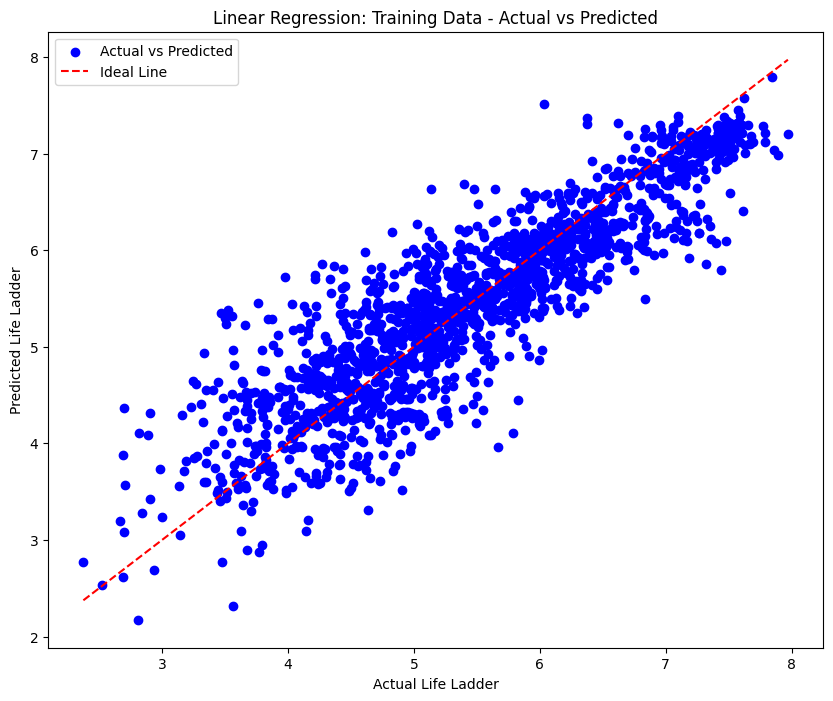

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot for training data
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Linear Regression: Training Data - Actual vs Predicted')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.legend()
plt.show()


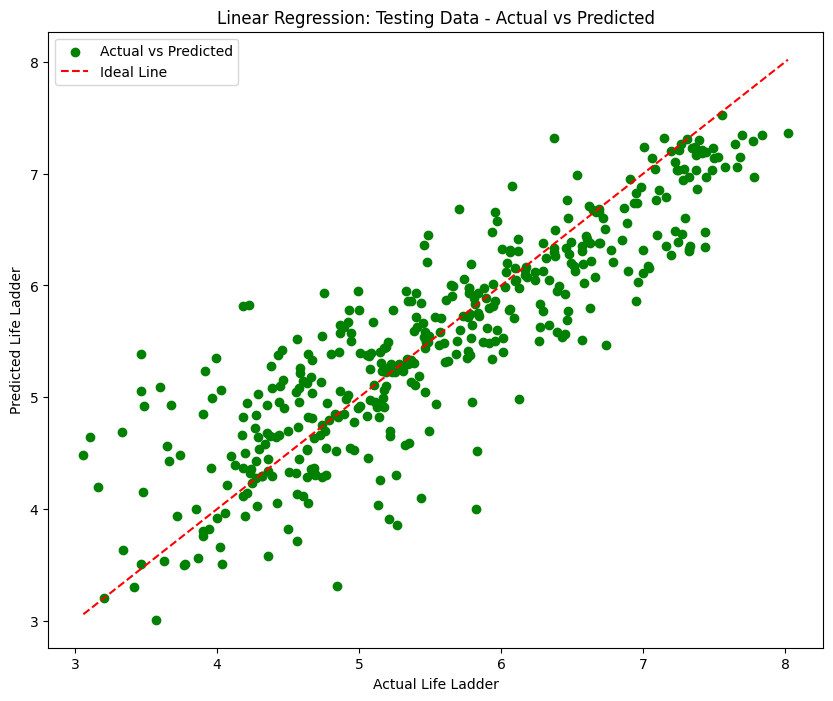

In [ ]:
# Create scatter plot for testing data
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Linear Regression: Testing Data - Actual vs Predicted')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.legend()
plt.show()


Conclusion on Linear Regression Model > R² (Coefficient of Determination): training R² of 0.769 and testing R² of 0.733 suggest that the model explains approximately 76.9% and 73.3% of the variance in the target variable, respectively. These values are relatively high, indicating a good fit of the model to the data.

Mean Absolute Error (MAE):  the training and testing MAE values are 0.445, which suggests that, on average, the model's predictions are off by approximately 0.445 units from the actual values.

Mean Squared Error (MSE): Both the training and testing MSE values are 0.334, which suggests that, on average, the square of the errors between the predicted and actual values is approximately 0.334 units.

Root Mean Squared Error (RMSE):  Both the training and testing RMSE values are 0.578, which suggests that, on average, the model's predictions are off by approximately 0.578 units from the actual values.

Overall, these metrics indicate that the linear regression model performs reasonably well in predicting the Life Ladder score based on the provided features. However, there is still room for improvement, especially considering potential complexities and nuances in the data that may not be captured by a linear model.
Most important Features: social support, positive affect, and Freedom to make life choices.